<a href="https://colab.research.google.com/github/HagarSharkawy/Data-Analysis-Hotel-Project/blob/main/project_dsci2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/malakelzwawy509/data_hotel/refs/heads/main/hotel_bookings_updated_2024.csv")

column_names = df.columns
print(column_names)
print("This is a Statistical Summary:")
numeric_summary = df.describe()
numeric_summary.loc['range'] = numeric_summary.loc['max'] - numeric_summary.loc['min']
print(numeric_summary)
print(df.dtypes)
df['customer_type'].unique()


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'city'],
      dtype='object')
This is a Statistical Summary:
         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000           119390.0   
mean        0.370416     104.011416             2024.0   
std         0.482918     106.863097                0.0   
min        

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

**Frequency counts for a categorical** **column** **bold text**

In [ ]:
df['hotel'].value_counts(normalize=True)


,proportion
hotel,
City Hotel - Ahmedabad,0.045272
City Hotel - Bhopal,0.044954
City Hotel - Jaipur,0.044752
City Hotel - Pune,0.044752
City Hotel - Kolkata,0.044719
City Hotel - Hyderabad,0.044719
City Hotel - Goa,0.044367
City Hotel - Chandigarh,0.044334
City Hotel - Lucknow,0.044309


**Proportions**

In [ ]:
freq_table = pd.DataFrame({
    'count': df['hotel'].value_counts(),
    'proportion': df['hotel'].value_counts(normalize=True)
})

print(freq_table)


                           count  proportion
hotel                                       
City Hotel - Ahmedabad      5405    0.045272
City Hotel - Bhopal         5367    0.044954
City Hotel - Jaipur         5343    0.044752
City Hotel - Pune           5343    0.044752
City Hotel - Kolkata        5339    0.044719
City Hotel - Hyderabad      5339    0.044719
City Hotel - Goa            5297    0.044367
City Hotel - Chandigarh     5293    0.044334
City Hotel - Lucknow        5290    0.044309
City Hotel - Mumbai         5265    0.044099
City Hotel - Delhi          5252    0.043990
City Hotel - Chennai        5251    0.043982
City Hotel - Bangalore      5210    0.043638
City Hotel - Indore         5170    0.043303
City Hotel - Kochi          5166    0.043270
Resort Hotel - Bhopal       2737    0.022925
Resort Hotel - Delhi        2726    0.022833
Resort Hotel - Kochi        2723    0.022808
Resort Hotel - Jaipur       2695    0.022573
Resort Hotel - Bangalore    2687    0.022506
Resort Hot

**Freqeucy of all categorical columns**

In [ ]:
categorical_cols = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date', 'city']

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(normalize=True))


Column: hotel
hotel
City Hotel - Ahmedabad       0.045272
City Hotel - Bhopal          0.044954
City Hotel - Jaipur          0.044752
City Hotel - Pune            0.044752
City Hotel - Kolkata         0.044719
City Hotel - Hyderabad       0.044719
City Hotel - Goa             0.044367
City Hotel - Chandigarh      0.044334
City Hotel - Lucknow         0.044309
City Hotel - Mumbai          0.044099
City Hotel - Delhi           0.043990
City Hotel - Chennai         0.043982
City Hotel - Bangalore       0.043638
City Hotel - Indore          0.043303
City Hotel - Kochi           0.043270
Resort Hotel - Bhopal        0.022925
Resort Hotel - Delhi         0.022833
Resort Hotel - Kochi         0.022808
Resort Hotel - Jaipur        0.022573
Resort Hotel - Bangalore     0.022506
Resort Hotel - Chandigarh    0.022489
Resort Hotel - Goa           0.022414
Resort Hotel - Chennai       0.022397
Resort Hotel - Mumbai        0.022364
Resort Hotel - Indore        0.022255
Resort Hotel - Pune          

Heat map that show the correlation

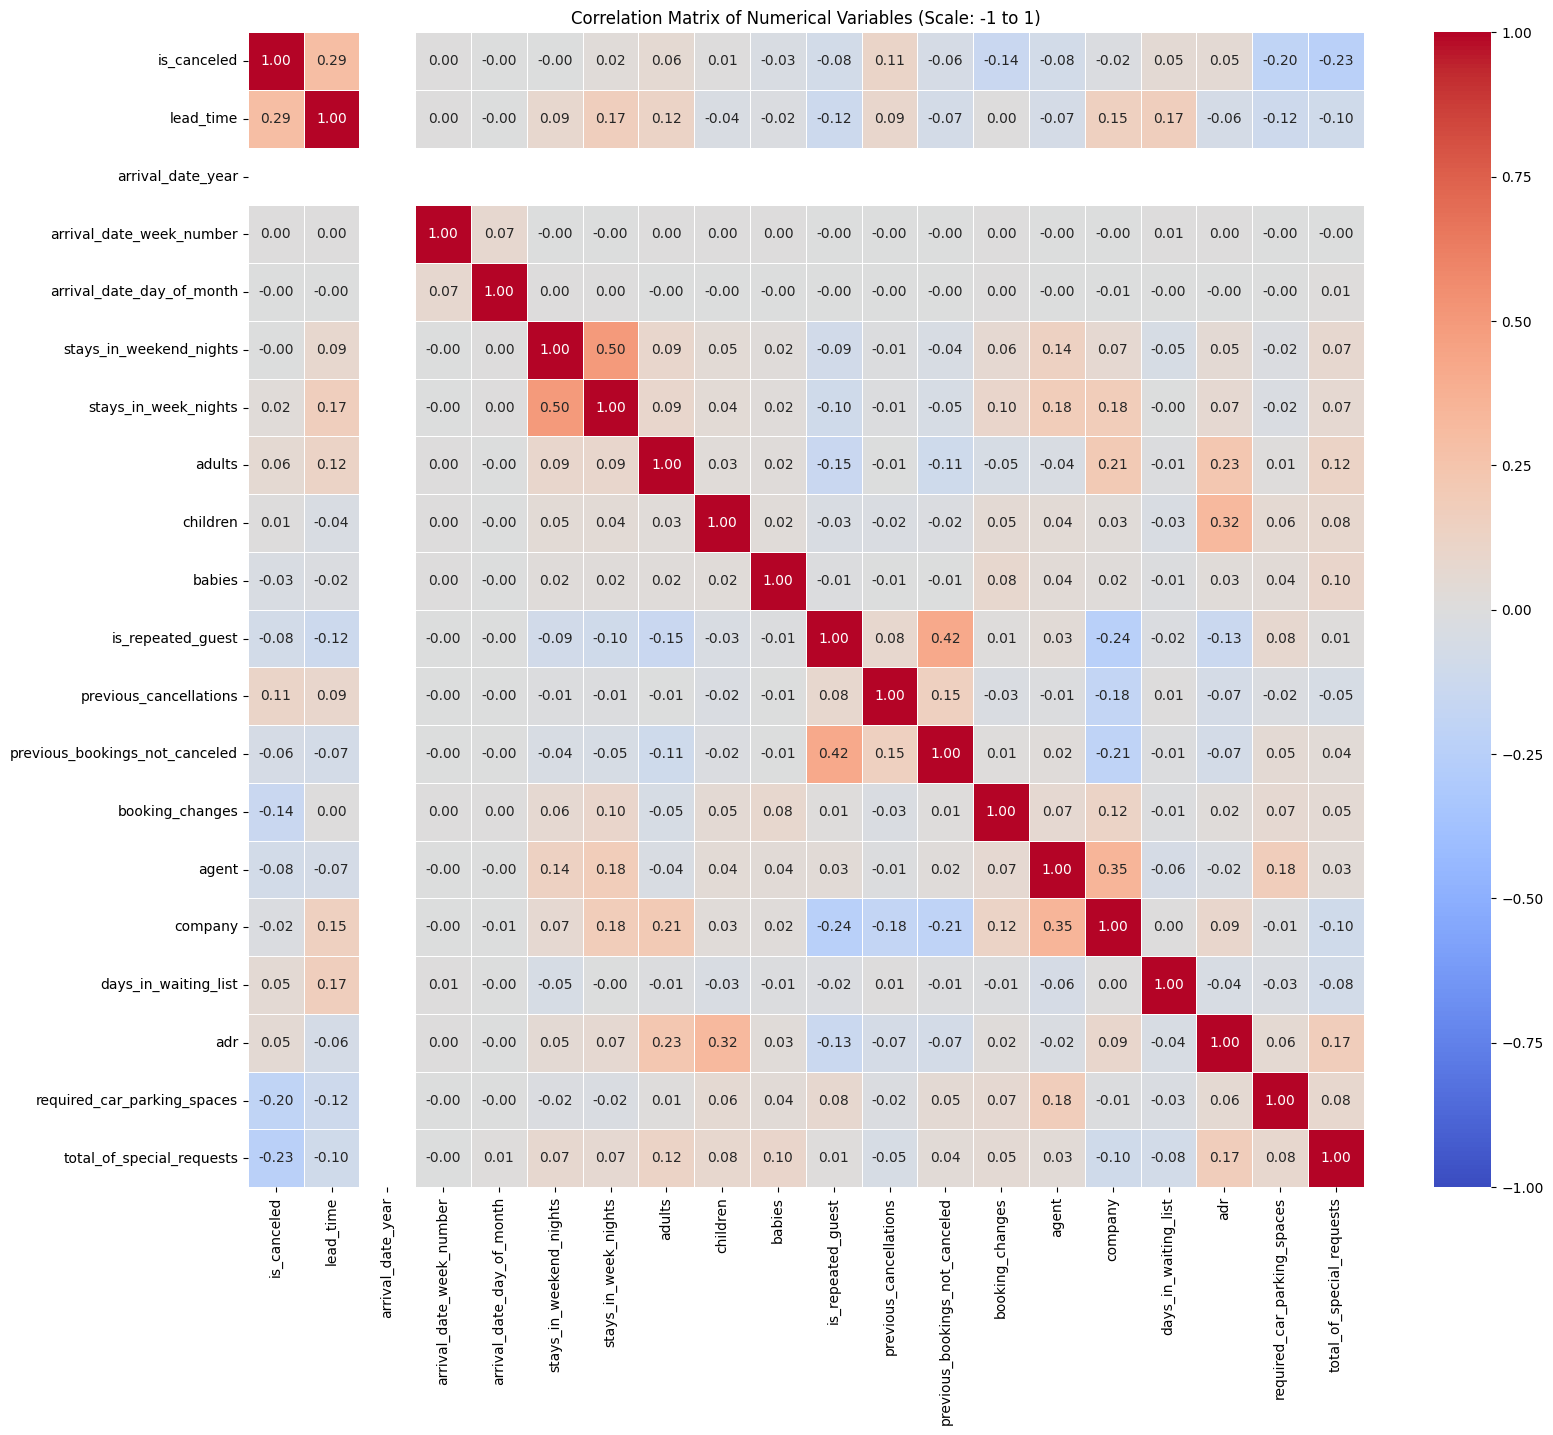

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/malakelzwawy509/data_hotel/refs/heads/main/hotel_bookings_updated_2024.csv")

# Automatically detect numerical columns if numerical_cols is not defined
if 'numerical_cols' not in locals():
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the correlation matrix for numerical columns
correlation_matrix = df[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    vmin=-1, vmax=1   # keep consistent correlation scale
)

plt.title('Correlation Matrix of Numerical Variables (Scale: -1 to 1)')
plt.show()

Missing Data

In [ ]:
# Missing count and percentage
missing_table = pd.DataFrame({
    "missing_count": df.isna().sum(),
    "missing_percent": round(df.isna().mean() * 100, 2)
})

print("Missing Data Summary:")
print(missing_table)


Outliers or Anomalies

In [ ]:
import numpy as np

continuous_cols = df.select_dtypes(include=[np.number]).columns

outlier_summary = {}

for col in continuous_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)][col].count()
    outlier_summary[col] = outliers

outlier_summary = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['outlier_count'])
print("Outlier Summary (IQR method):")
print(outlier_summary)


Data Format Issues

In [ ]:
format_issues = {}

for col in df.columns:
    # Check for mixed types
    types = df[col].apply(lambda x: type(x)).nunique()
    if types > 1:
        format_issues[col] = "Mixed data types detected"

    # Check for leading/trailing spaces in string columns
    if df[col].dtype == "object":
        if df[col].str.contains(r"^\s+|\s+$", regex=True).any():
            format_issues[col] = "Whitespace formatting issues found"

print("Data Format Issues:")
print(format_issues)


Variables Requiring Transformation / Preprocessing

In [ ]:
import numpy as np

variables_to_transform = []

# Log transform candidates (skewed numeric variables)
continuous_cols = df.select_dtypes(include=[np.number]).columns # Moved definition here
skewness = df[continuous_cols].skew()

for col in continuous_cols:
    if abs(skewness[col]) > 1:   # highly skewed
        variables_to_transform.append((col, "log / normalization recommended"))

# Categorical encoding needed
categorical_cols = df.select_dtypes(include=['object','category']).columns

for col in categorical_cols:
    if df[col].nunique() > 10:
        variables_to_transform.append((col, "high-cardinality category — encoding needed"))
    else:
        variables_to_transform.append((col, "ordinal/one-hot encoding"))

print("Variables Requiring Transformation or Preprocessing:")
for item in variables_to_transform:
    print(item)

**Data Cleaning**

In [ ]:
# Combining columns
df['total children'] = df['children'] + df['babies']
df['total nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['family size'] = df['children'] + df['babies'] + df['adults']

In [ ]:
df["month_num"] = pd.to_datetime(df["arrival_date_month"], format="%B").dt.month

# map month number to season
season_map = {
    12: "Winter", 1: "Winter", 2: "Winter",
    3: "Spring", 4: "Spring", 5: "Spring",
    6: "Summer", 7: "Summer", 8: "Summer",
    9: "Autumn", 10: "Autumn", 11: "Autumn"
}

df["season"] = df["month_num"].map(season_map)
df["season"]

,season
0,Summer
1,Spring
2,Autumn
3,Summer
4,Autumn
...,...
119385,Autumn
119386,Autumn
119387,Spring
119388,Autumn


In [ ]:
peak_season = df['season'].value_counts().sort_values(ascending=False).index[0]
peak_season

'Spring'

In [ ]:
worst_season = df['season'].value_counts().sort_values(ascending=True).index[0]
worst_season

'Winter'

In [ ]:
peak_city = df['city'].value_counts().sort_values(ascending=False).index[0]
peak_city

'Bhopal'

In [ ]:
avg_spring_stay = df[df["season"] == "Spring"]["total nights"].mean()
avg_spring_stay

np.float64(3.425178068577108)